In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import plotly.express as px

# Automobile Data Analysis starte from here

In [15]:
df = pd.read_csv('automobile.csv')

In [16]:
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [17]:
df.shape

(1581, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


In [19]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


# As we can see there are some irregularities in the "Gender" column and "Partner Salary" column, Let's Check both columns

In [20]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

# Let's correct the spelling mistakes in "gender" column

In [21]:
df['Gender'] = df['Gender'].replace('Femal','Female')
df['Gender'] = df['Gender'].replace('Femle','Female')

# Now we will treat the null values in "gender" column

In [22]:
df['Gender'] = df['Gender'].replace(np.nan,'Male')

In [23]:
df['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

# Let's check first and then treat the null values in "partner salary" column

In [24]:
df['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000.,    nan, 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

In [25]:
df['Partner_salary'].median()

25600.0

In [26]:
df['Partner_salary'] = df['Partner_salary'].replace(np.nan,df['Partner_salary'].median())

In [27]:
df['Partner_salary'].unique()

array([70700., 70300., 60700., 60200., 60500., 50800., 40400.,     0.,
       70600., 60600., 60300., 45500., 40200., 40700.,   600.,   700.,
       27800., 70000., 40100., 40900., 27000., 25600., 40500., 50400.,
       80400., 60900., 60100., 70200., 30000., 40300., 40800., 70800.,
         900., 45000., 40600., 50700., 80500., 27700., 35800., 26600.,
       60000., 27900., 60800., 40000., 70100., 38100., 38200., 30200.,
       38500., 50900., 35100., 38700., 38300., 38900., 23200., 24700.,
       30800., 28100., 38400., 38000., 23100., 30100., 25700., 70400.,
         200., 30900., 26100., 45700.,   400., 28200., 70900., 38800.,
       45200., 26800., 60400., 30300., 25800.,   800., 38600., 24500.,
       30700., 28500., 24900., 70500., 35900., 30500., 28900., 27200.,
       45900., 25300., 35600., 25000., 25200., 26300., 35700., 23800.,
       32700., 30600., 45600., 28000., 32600., 28600., 25100., 26700.,
       24200., 25900., 22100., 25400., 28400., 28300., 25500., 24000.,
      

# Now we have treated null values and data irregularities in both "partner salary" and "gender" column..See below

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


# Let's check outlier in all the numerical columns first

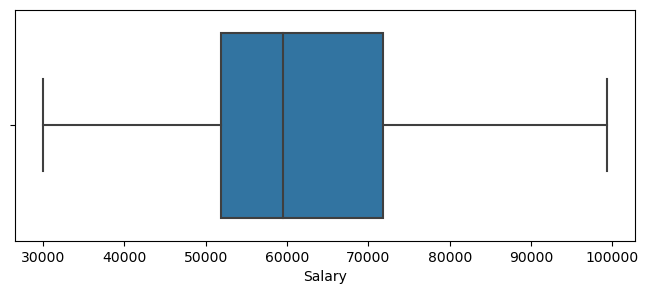

In [29]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,x='Salary');

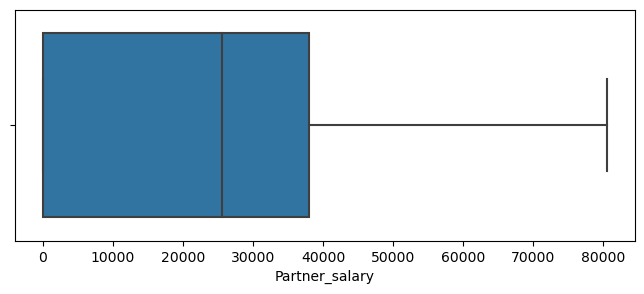

In [30]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,x='Partner_salary');

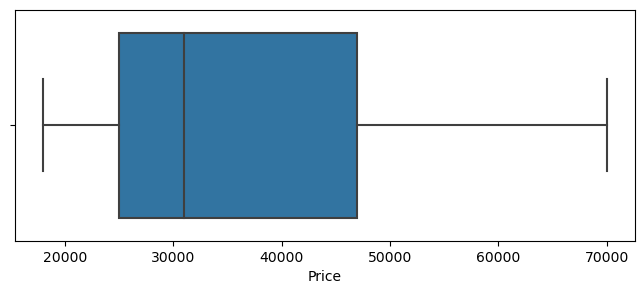

In [31]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,x='Price');

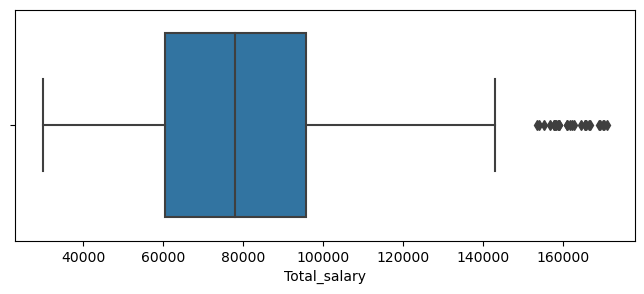

In [32]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,x='Total_salary');

# Now we can see that there are outliers in "total salary" column let's treat the outlier by boxplot method

In [33]:
df.Total_salary.describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

In [34]:
df['Total_salary1'] = df['Total_salary']

In [35]:
df.Total_salary1.describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary1, dtype: float64

<Axes: xlabel='Total_salary1'>

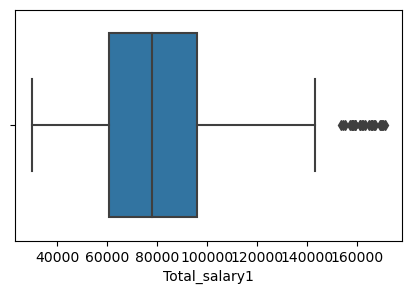

In [36]:
plt.figure(figsize=(5,3))
sns.boxplot(data=df,x='Total_salary1')

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [38]:
## Check the lower range and upper range for the variable with zscore
lr,ur=remove_outlier(df['Total_salary1'])
print("lower range",lr, "and upper range", ur)

lower range 7400.0 and upper range 149000.0


In [39]:
df['Total_salary1']=np.where(df['Total_salary1']>ur,ur,df['Total_salary1'])
df['Total_salary1']=np.where(df['Total_salary1']<lr,lr,df['Total_salary1'])

<Axes: xlabel='Total_salary1'>

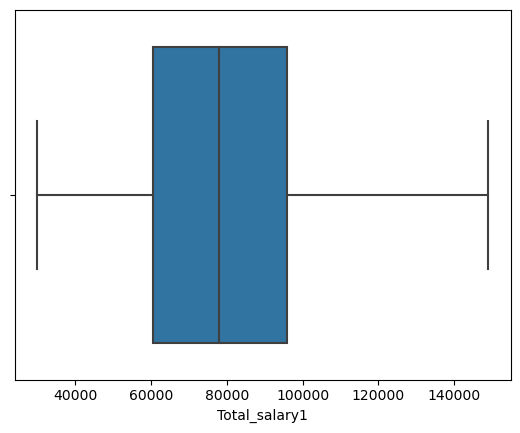

In [40]:
sns.boxplot(data=df,x='Total_salary1')

In [41]:
df['Total_salary'] = df['Total_salary1']

In [42]:
df.drop('Total_salary1' , axis=1, inplace=True)
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79398.545225,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,24849.147996,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,149000.000000,70000.000000


# Data is cleaned and correct, We have removed all null values, irregularities and outliers in data. Now we can start the analysis

In [43]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79398.545225,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,24849.147996,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,149000.000000,70000.000000


# Now we will divide the Age column in below 4 category - This will make our analysis more precise and insightful

## 1. 20-30
## 2. 30-40
## 3. 40-50
## 4. 50-60

In [44]:
df_age_2030 = df[df['Age'] <= 30]
df_age_3040 = df[(df['Age'] > 30) & (df['Age'] <= 40)]
df_age_4050 = df[(df['Age'] > 40) & (df['Age'] <= 50)]
df_age_5060 = df[df['Age'] > 50]

In [45]:
df.loc[df['Age'] <= 30, 'Age_category'] = 'age_2030'
df.loc[(df['Age'] > 30) & (df['Age'] <= 40), 'Age_category'] = 'age_3040'
df.loc[(df['Age'] > 40) & (df['Age'] <= 50), 'Age_category'] = 'age_4050'
df.loc[df['Age'] > 50, 'Age_category'] = 'age_5060'

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
 14  Age_category      1581 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 185.4+ KB


In [47]:
df['Age_category'].value_counts()

age_2030    958
age_3040    319
age_4050    235
age_5060     69
Name: Age_category, dtype: int64

# Creating "Both_loans" column (House and Personal loans) to check how many customers have taken both loans and creating "No_loans" column to check how many customers have not taken any loan

In [48]:
df['House'] = np.where(df['House_loan'] == 'Yes' , 1,0)

In [49]:
df['Personal'] = np.where(df['Personal_loan'] == 'Yes' , 1,0)

In [50]:
df['House_and_personal'] = df['House'] + df['Personal']

In [51]:
df['Both_loans'] = np.where(df['House_and_personal'] == 2 , 'Yes' , 'No')

In [52]:
df['No_loans'] = np.where(df['House_and_personal'] == 0 , 'Yes' , 'No')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1581 non-null   int64  
 1   Gender              1581 non-null   object 
 2   Profession          1581 non-null   object 
 3   Marital_status      1581 non-null   object 
 4   Education           1581 non-null   object 
 5   No_of_Dependents    1581 non-null   int64  
 6   Personal_loan       1581 non-null   object 
 7   House_loan          1581 non-null   object 
 8   Partner_working     1581 non-null   object 
 9   Salary              1581 non-null   int64  
 10  Partner_salary      1581 non-null   float64
 11  Total_salary        1581 non-null   float64
 12  Price               1581 non-null   int64  
 13  Make                1581 non-null   object 
 14  Age_category        1581 non-null   object 
 15  House               1581 non-null   int32  
 16  Person

In [54]:
df.drop('House' , axis = 1 , inplace=True)
df.drop('Personal' , axis = 1 , inplace=True)
df.drop('House_and_personal' , axis = 1 , inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   float64
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
 14  Age_category      1581 non-null   object 
 15  Both_loans        1581 non-null   object 
 16  No_loans          1581 non-null   object 


In [56]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000,1581.000000
mean,31.922201,2.457938,60392.220114,20585.895003,79398.545225,35597.722960
std,8.425978,0.943483,14674.825044,18952.938643,24849.147996,13633.636545
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38000.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,149000.000000,70000.000000


# Uni -Variate Analysis

In [57]:
df['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

<Axes: xlabel='Make', ylabel='count'>

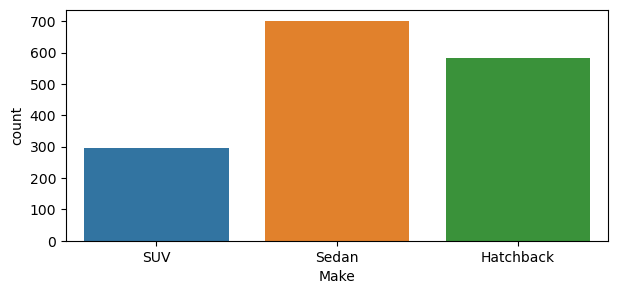

In [58]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Make')

In [59]:
df['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

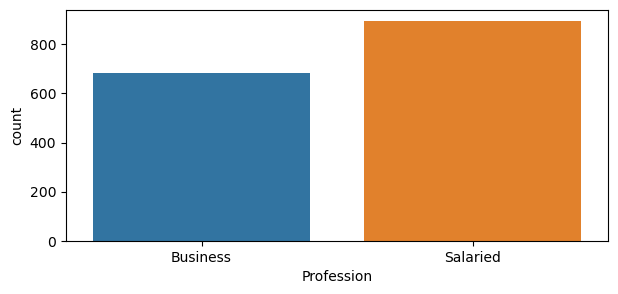

In [60]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Profession')

In [61]:
df['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

<Axes: xlabel='Marital_status', ylabel='count'>

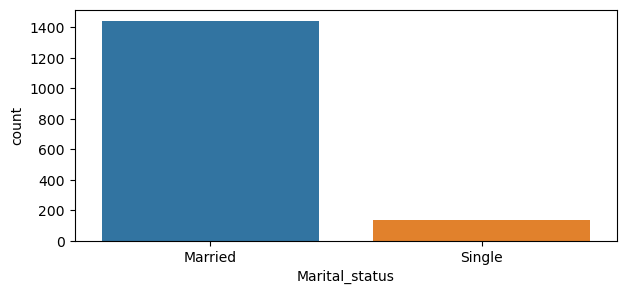

In [62]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Marital_status')

In [63]:
df['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

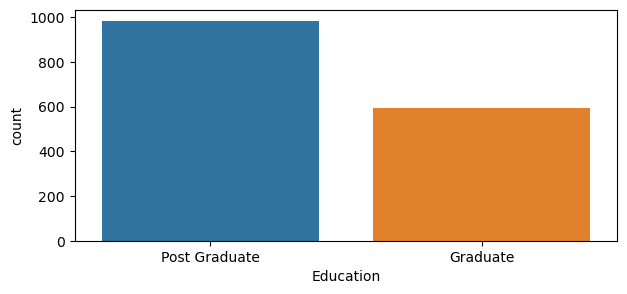

In [64]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Education')

In [65]:
df['No_of_Dependents'].value_counts()

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

<Axes: xlabel='No_of_Dependents', ylabel='count'>

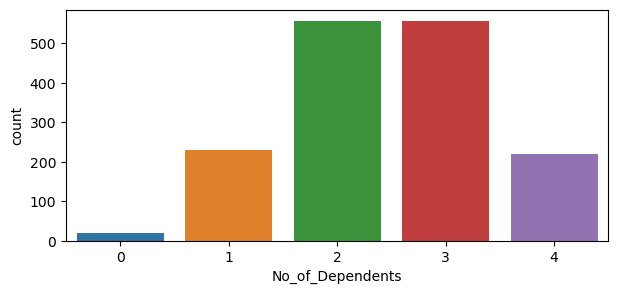

In [66]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='No_of_Dependents')

In [67]:
df['Personal_loan'].value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

<Axes: xlabel='Personal_loan', ylabel='count'>

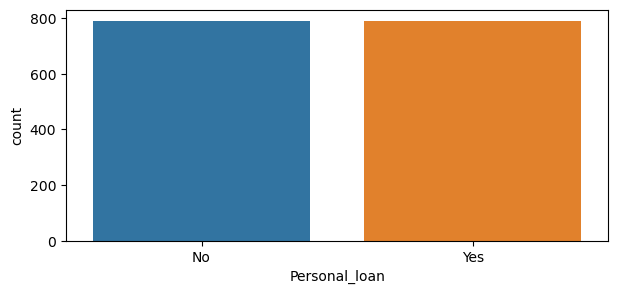

In [68]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Personal_loan')

In [69]:
df['House_loan'].value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

<Axes: xlabel='House_loan', ylabel='count'>

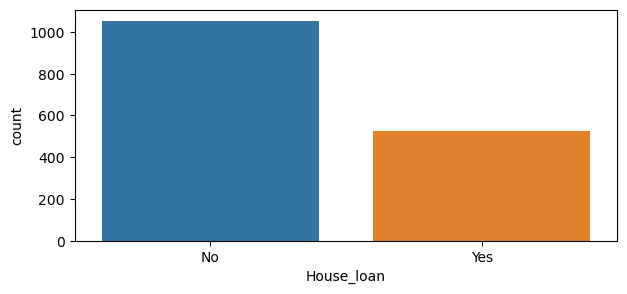

In [70]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='House_loan')

In [71]:
df['Partner_working'].value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

<Axes: xlabel='Partner_working', ylabel='count'>

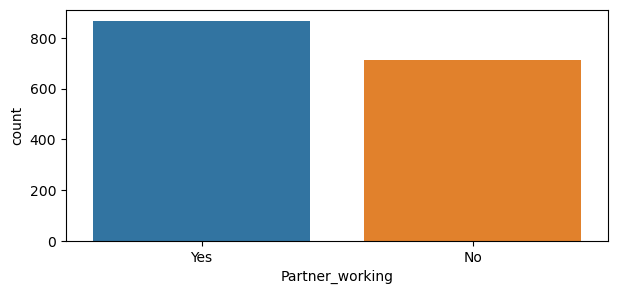

In [72]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Partner_working')

In [73]:
df['Age_category'].value_counts()

age_2030    958
age_3040    319
age_4050    235
age_5060     69
Name: Age_category, dtype: int64

<Axes: xlabel='Age_category', ylabel='count'>

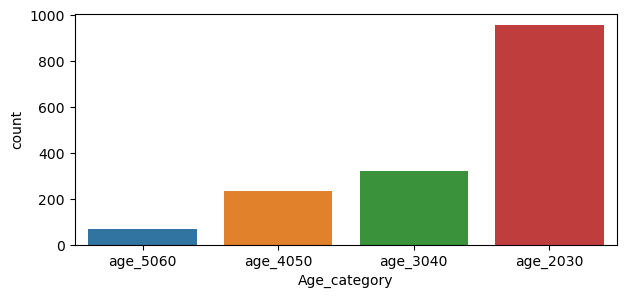

In [74]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Age_category')

# 

# Q.1 Which Make (Car type) is the highest selling?

In [75]:
df['Make'].value_counts(normalize=True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

# Q.2 What is the total revenue and individual Make (Car type) is generating how much revenue?

In [76]:
df.groupby('Make')['Total_salary'].sum().sort_values(ascending=False)

Make
Sedan        55868500.0
Hatchback    41332500.0
SUV          28328100.0
Name: Total_salary, dtype: float64

In [77]:
percent = df.groupby('Make')['Total_salary'].sum().sort_values(ascending=False)
percent

Make
Sedan        55868500.0
Hatchback    41332500.0
SUV          28328100.0
Name: Total_salary, dtype: float64

In [78]:
total = df['Total_salary'].sum()
total

125529100.0

In [79]:
answer = percent/total
answer.sort_values(ascending=False) 

Make
Sedan        0.445064
Hatchback    0.329266
SUV          0.225670
Name: Total_salary, dtype: float64

# Q.3 Explore variables like No of dependents and partner working?

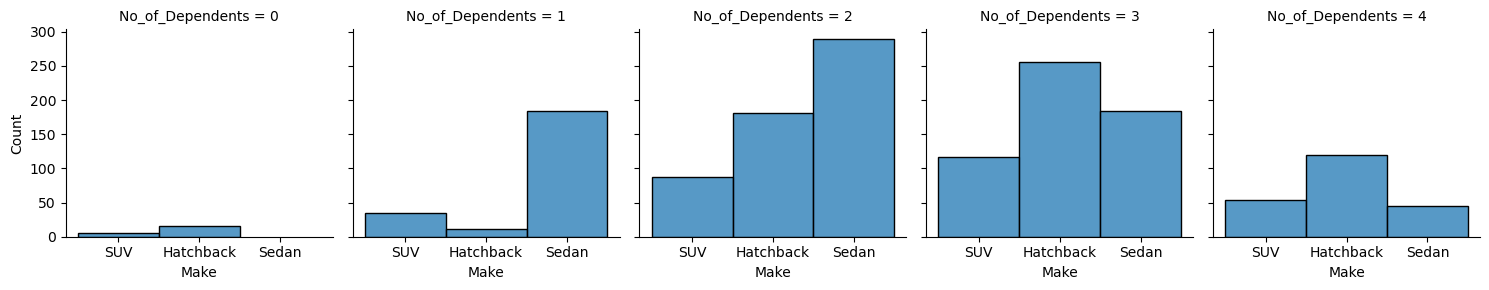

In [80]:
g = sns.FacetGrid(df,col='No_of_Dependents')
g.map(sns.histplot,'Make');

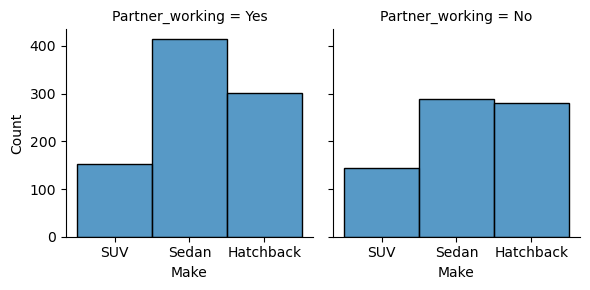

In [81]:
g = sns.FacetGrid(df,col='Partner_working')
g.map(sns.histplot,'Make');

# 

# Multi-Variate Analysis

# Q.4 Which car type price is highest and who is the customer? (Gender, Age)

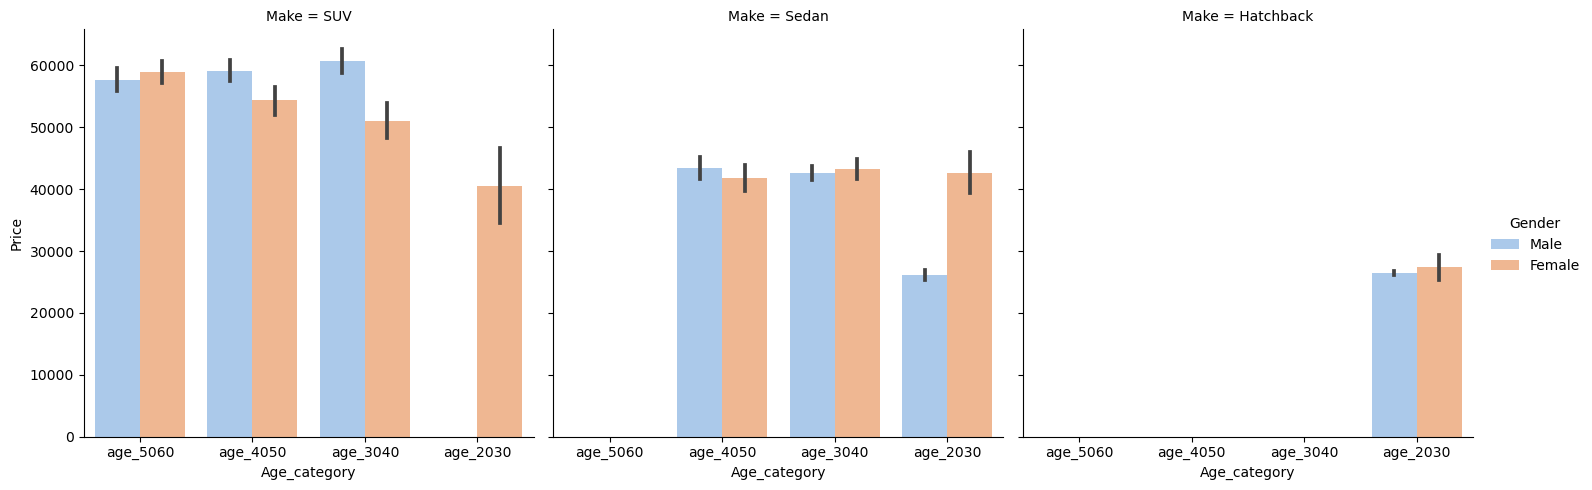

<Figure size 1500x700 with 0 Axes>

In [82]:
sns.catplot(data=df,x='Age_category',y='Price' ,hue='Gender', col='Make',kind='bar',palette='pastel');
plt.figure(figsize=(15,7));

# Q.5 Which age group customers are purchasing most cars?

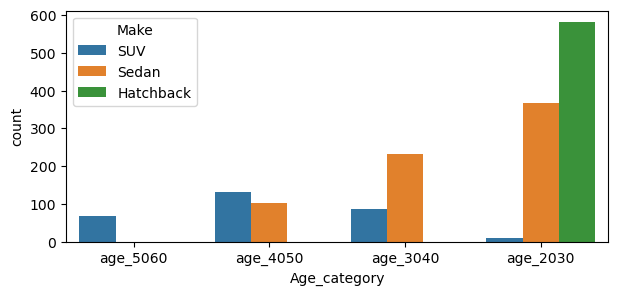

In [83]:
plt.figure(figsize=(7,3));
sns.countplot(data=df,x='Age_category' , hue='Make');

In [84]:
df['Age_category'].value_counts(normalize=True)

age_2030    0.605946
age_3040    0.201771
age_4050    0.148640
age_5060    0.043643
Name: Age_category, dtype: float64

# Q.6 Does marital status influence the purchasing pattern of cars?

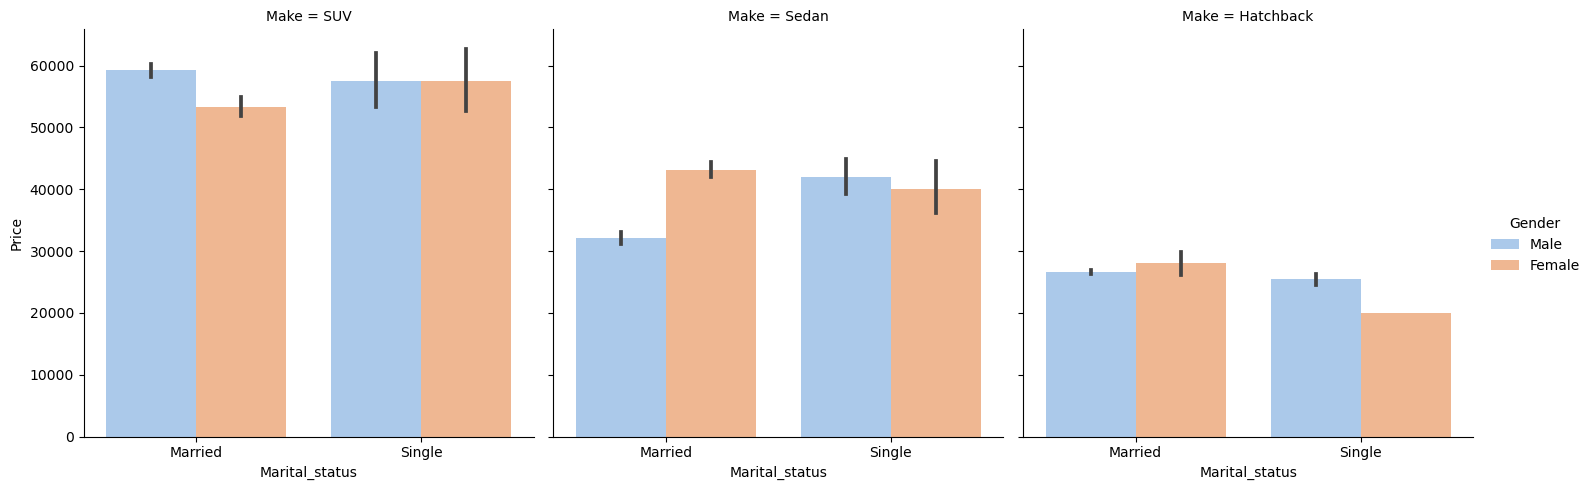

<Figure size 1500x700 with 0 Axes>

In [85]:
sns.catplot(data=df,x='Marital_status',y='Price' ,hue='Gender', col='Make',kind='bar',palette='pastel');
plt.figure(figsize=(15,7));

In [86]:
df.groupby(['Make' , 'Marital_status','Gender'])['Price'].agg(['sum','count']).sort_values(by='count' , ascending=False)

,,,sum,count
Make,Marital_status,Gender,,
Sedan,Married,Male,17253000,537
Hatchback,Married,Male,12886000,484
SUV,Married,Female,8849000,166
Sedan,Married,Female,5470000,127
SUV,Married,Male,6810000,115
Hatchback,Single,Male,2110000,83
Sedan,Single,Male,1008000,24
Hatchback,Married,Female,392000,14
Sedan,Single,Female,561000,14


In [87]:
df['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [88]:
df['Marital_status'].count()

1581

In [89]:
percent = df['Marital_status'].value_counts()/df['Marital_status'].count()
percent

Married    0.912713
Single     0.087287
Name: Marital_status, dtype: float64

In [90]:
percent1 = df.groupby(['Make' , 'Marital_status','Gender'])['Price'].count()
percent1

Make       Marital_status  Gender
Hatchback  Married         Female     14
                           Male      484
           Single          Female      1
                           Male       83
SUV        Married         Female    166
                           Male      115
           Single          Female      7
                           Male        9
Sedan      Married         Female    127
                           Male      537
           Single          Female     14
                           Male       24
Name: Price, dtype: int64

In [91]:
gender = percent1/df['Marital_status'].count()
gender.sort_values(ascending=False)

Make       Marital_status  Gender
Sedan      Married         Male      0.339658
Hatchback  Married         Male      0.306135
SUV        Married         Female    0.104997
Sedan      Married         Female    0.080329
SUV        Married         Male      0.072739
Hatchback  Single          Male      0.052498
Sedan      Single          Male      0.015180
Hatchback  Married         Female    0.008855
Sedan      Single          Female    0.008855
SUV        Single          Male      0.005693
                           Female    0.004428
Hatchback  Single          Female    0.000633
Name: Price, dtype: float64

# Q.7 Does Education of customers have any relevance in the purchase pattern?

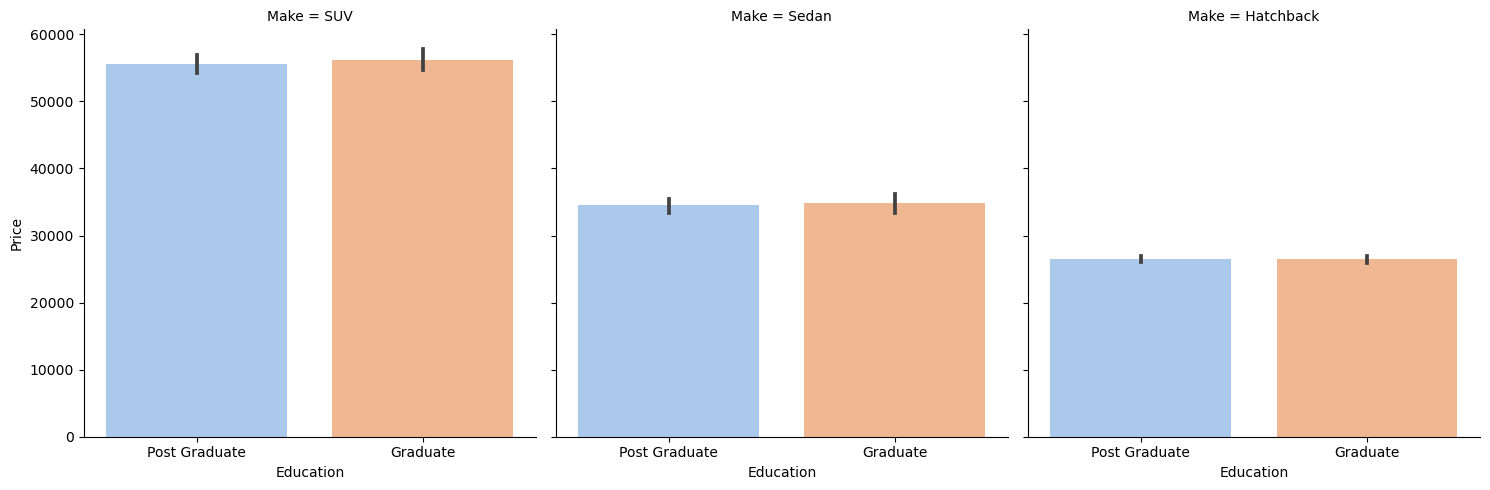

<Figure size 1500x700 with 0 Axes>

In [92]:
sns.catplot(data=df,x='Education',y='Price', col='Make',kind='bar',palette='pastel');
plt.figure(figsize=(15,7));

In [93]:
percent = df.groupby(['Make' , 'Education'])['Price'].count()
percent.sort_values(ascending=False)

Make       Education    
Sedan      Post Graduate    443
Hatchback  Post Graduate    362
Sedan      Graduate         259
Hatchback  Graduate         220
SUV        Post Graduate    180
           Graduate         117
Name: Price, dtype: int64

In [94]:
total = df['Make'].count()
total

1581

In [95]:
status = percent/total
status.sort_values(ascending=False)

Make       Education    
Sedan      Post Graduate    0.280202
Hatchback  Post Graduate    0.228969
Sedan      Graduate         0.163820
Hatchback  Graduate         0.139152
SUV        Post Graduate    0.113852
           Graduate         0.074004
Name: Price, dtype: float64

# Q.8 Does House loans and personal loans customers are buying more cars?

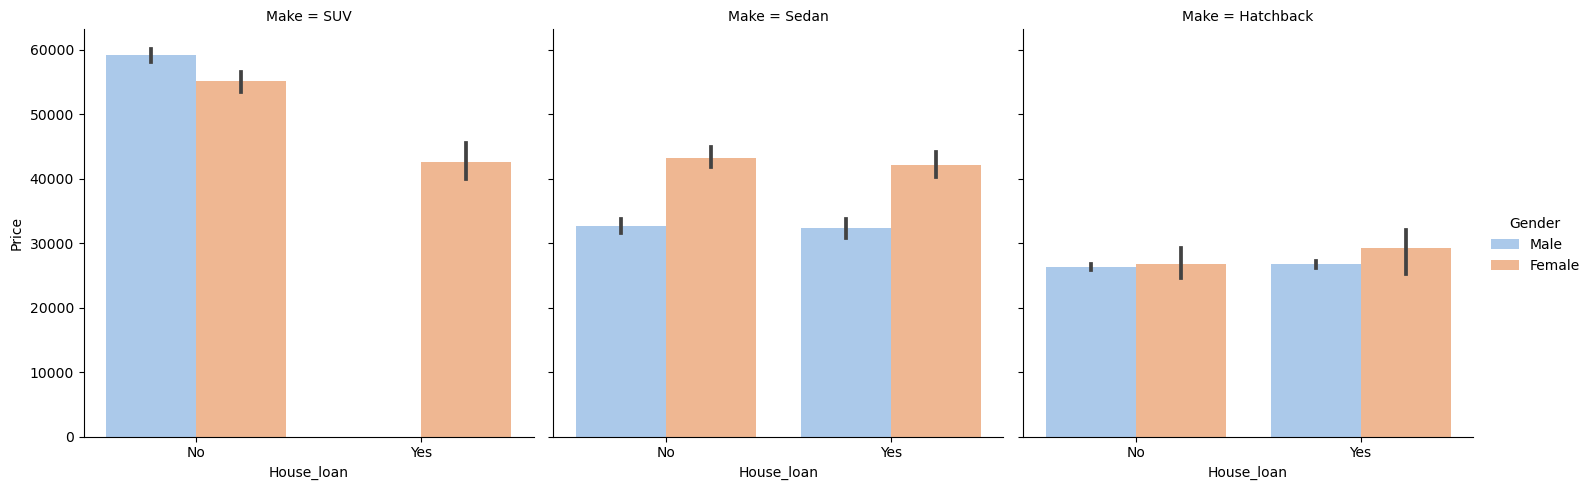

<Figure size 1500x700 with 0 Axes>

In [96]:
sns.catplot(data=df,x='House_loan',y='Price' ,hue='Gender', col='Make',kind='bar',palette='pastel');
plt.figure(figsize=(15,7));

In [97]:
df.groupby(['Make' , 'House_loan'])['Price'].agg(['sum','count']).sort_values(by='sum' , ascending=False)

sum  count
Make      House_loan                 
SUV       No          15643000    275
Sedan     No          14982000    432
          Yes          9310000    270
Hatchback No           9119000    347
          Yes          6289000    235
SUV       Yes           937000     22

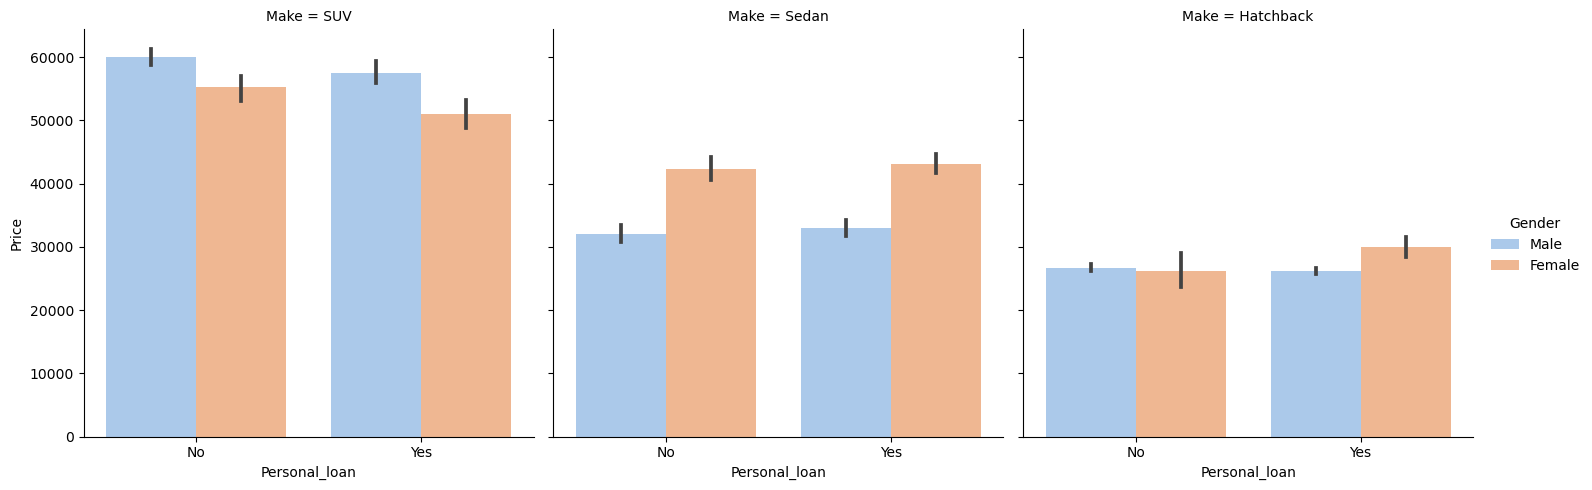

<Figure size 1500x700 with 0 Axes>

In [98]:
sns.catplot(data=df,x='Personal_loan',y='Price' ,hue='Gender', col='Make',kind='bar',palette='pastel');
plt.figure(figsize=(15,7)); 

In [99]:
df.groupby(['Make' , 'Personal_loan'])['Price'].agg(['sum','count']).sort_values(by='count' , ascending=False)

sum  count
Make      Personal_loan                 
Sedan     Yes            13440000    385
          No             10852000    317
Hatchback No              7765000    291
          Yes             7643000    291
SUV       No             10373000    181
          Yes             6207000    116

# Q9. Does partner working has any impact on purchasing cars?

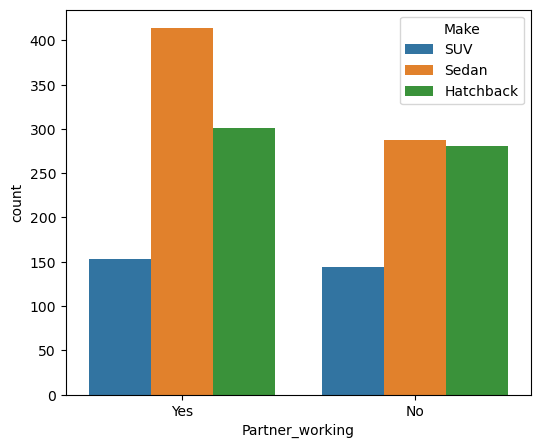

In [100]:
plt.figure(figsize=(6,5));
sns.countplot(data=df,x='Partner_working' , hue='Make');

In [101]:
df.groupby(['Make','Partner_working'])['Price'].agg(['sum','count']).sort_values(by='count' , ascending=False)

sum  count
Make      Partner_working                 
Sedan     Yes              14110000    414
Hatchback Yes               8011000    301
Sedan     No               10182000    288
Hatchback No                7397000    281
SUV       Yes               8491000    153
          No                8089000    144

# Q10. Which profession of customers are mostly purchasing cars and what type of car is preferred?

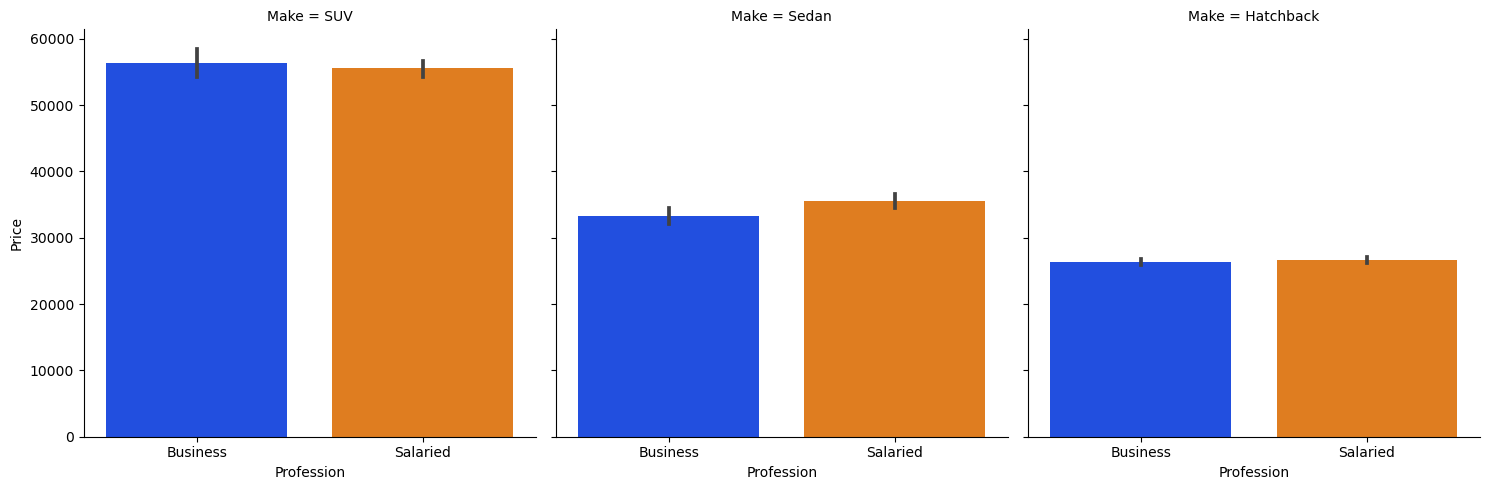

<Figure size 1500x700 with 0 Axes>

In [102]:
sns.catplot(data=df,x='Profession',y='Price' , col='Make',kind='bar',palette='bright');
plt.figure(figsize=(15,7));

In [103]:
percent = df.groupby(['Make' , 'Profession'])['Price'].count()
percent.sort_values(ascending=False)

Make       Profession
Sedan      Salaried      396
           Business      306
Hatchback  Salaried      292
           Business      290
SUV        Salaried      208
           Business       89
Name: Price, dtype: int64

In [104]:
total=df.shape[0]
total

1581

In [172]:
profession = percent/total
profession.sort_values(ascending=False)

Make       Profession
Sedan      Salaried      0.250474
           Business      0.193548
Hatchback  Salaried      0.184693
           Business      0.183428
SUV        Salaried      0.131562
           Business      0.056293
Name: Price, dtype: float64

# Q11. What is the relevance of Total salary with other variables?

C:\Users\ayush\AppData\Local\Temp\ipykernel_28764\3788481622.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f");


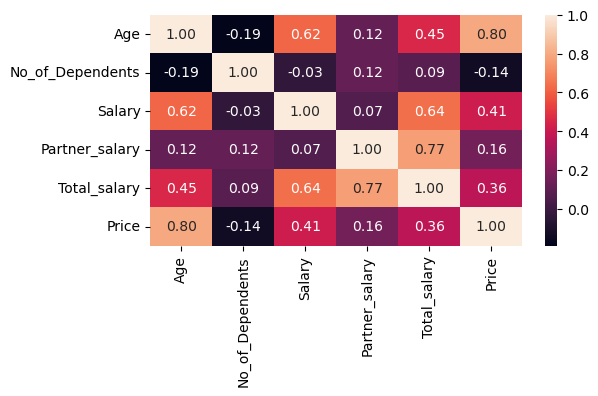

In [106]:
plt.figure(figsize=(6,3))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [107]:
df.corr()

C:\Users\ayush\AppData\Local\Temp\ipykernel_28764\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.121187,0.452844,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.121555,0.087606,-0.135839
Salary,0.616899,-0.031746,1.000000,0.065348,0.638625,0.409920
Partner_salary,0.121187,0.121555,0.065348,1.000000,0.765147,0.161136
Total_salary,0.452844,0.087606,0.638625,0.765147,1.000000,0.359651
Price,0.797831,-0.135839,0.409920,0.161136,0.359651,1.000000


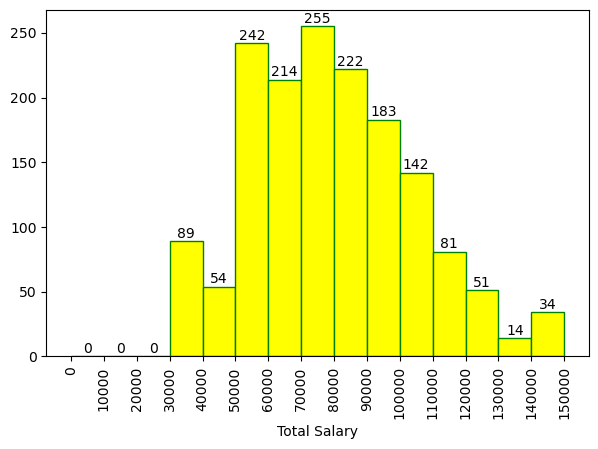

In [108]:
plt.figure(figsize=(7, 4.5))
freq, bins, patches = plt.hist(df['Total_salary'], 15, range=[0, 150000], edgecolor='green', color='yellow')
# freq is the count in each bin, bins is the lower-limit of the bin, patches. We are plotting histogram for CAR AGE.
# the number of bins are 8 and the x axis would range from 0 to 20. 
# Edgecolor is the border of each bar and color is the bar color

bin_centers = np.diff(bins)*0.5 + bins[:-1] #segmentation
n = 0

for fr, x, patch in zip(freq, bin_centers, patches): # Now, we'll loop through our objects and set the height accordingly
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1
# plt.title('Histogram - INCOME')
plt.xlabel('Total Salary')
plt.xticks(range(0,160000,10000))
plt.xticks(rotation=90)
plt.show()

In [109]:
sum1 = 242+214+255+222+183
sum1

1116

In [110]:
percent1 = sum1/total
percent1

0.7058823529411765

In [111]:
sal_70000_to_80000 = 255/total
sal_70000_to_80000

0.16129032258064516

# Q12. What is the output of customers who has taken both loans? (House and personal)

<Figure size 500x300 with 0 Axes>

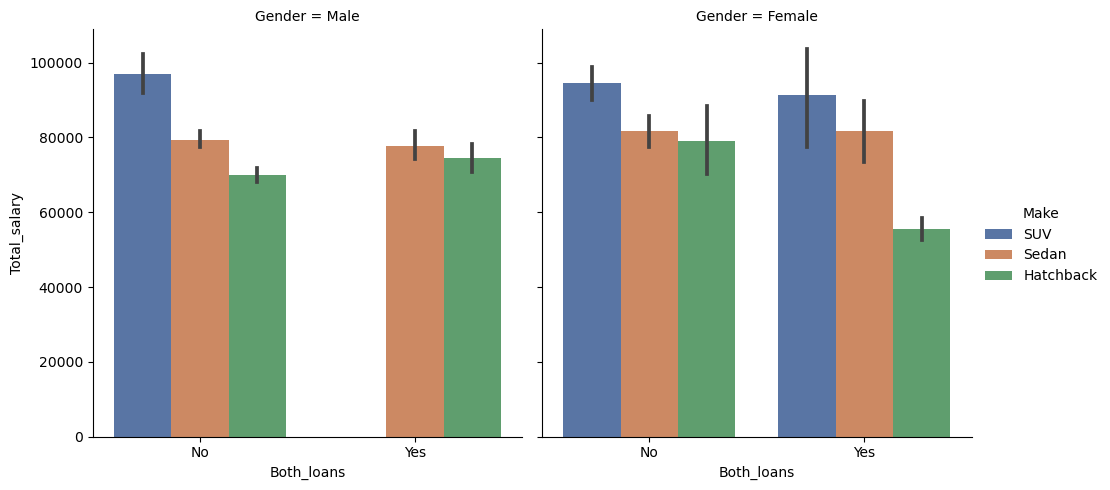

In [112]:
plt.figure(figsize=(5,3));
sns.catplot(data=df,x='Both_loans',y='Total_salary',hue='Make' , col='Gender',kind='bar',palette='deep');

<Figure size 500x300 with 0 Axes>

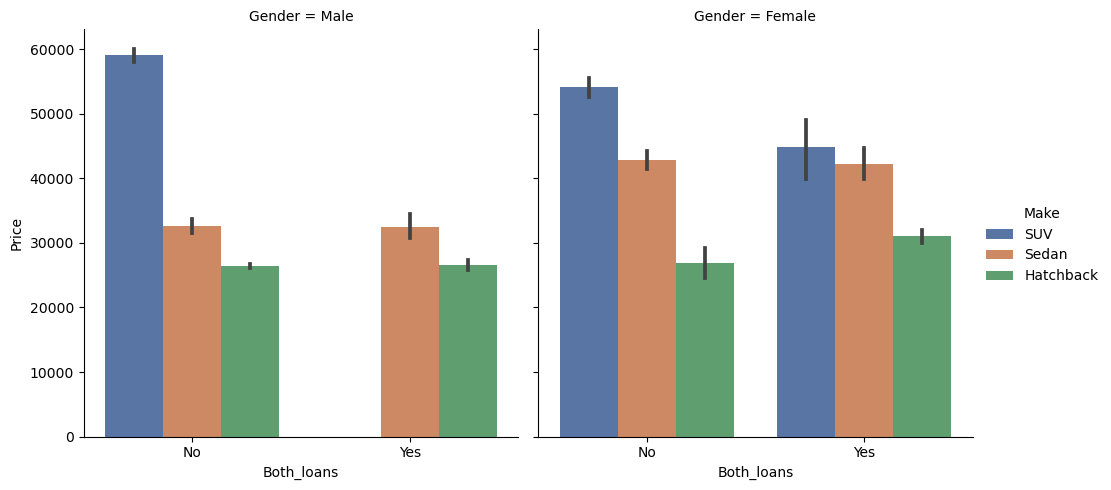

In [113]:
plt.figure(figsize=(5,3))
sns.catplot(data=df,x='Both_loans',y='Price',hue='Make' , col='Gender',kind='bar',palette='deep');

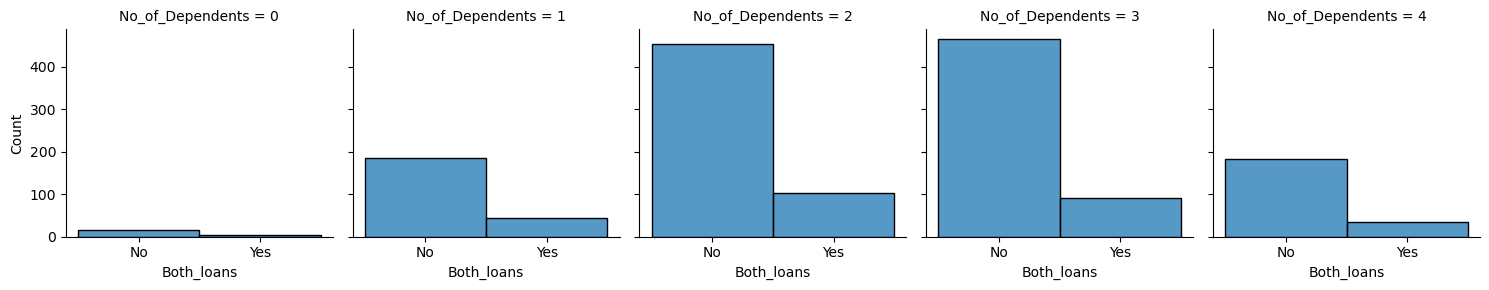

In [114]:
g = sns.FacetGrid(df,col='No_of_Dependents')
g.map(sns.histplot,'Both_loans');

# Q13. What is the output of customers who has not taken any loan? (House and personal)

<Figure size 500x300 with 0 Axes>

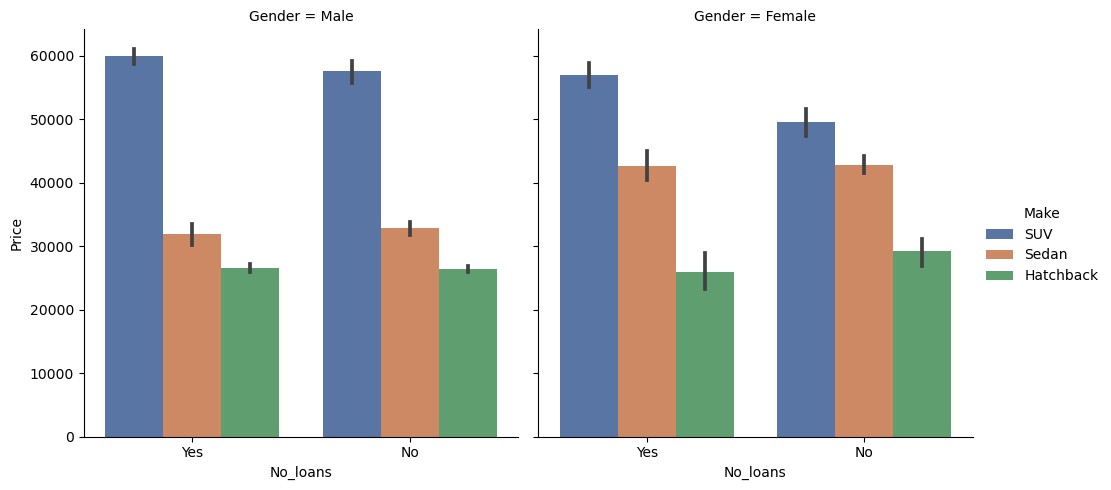

In [115]:
plt.figure(figsize=(5,3))
sns.catplot(data=df,x='No_loans',y='Price',hue='Make' , col='Gender',kind='bar',palette='deep')

<Figure size 500x300 with 0 Axes>

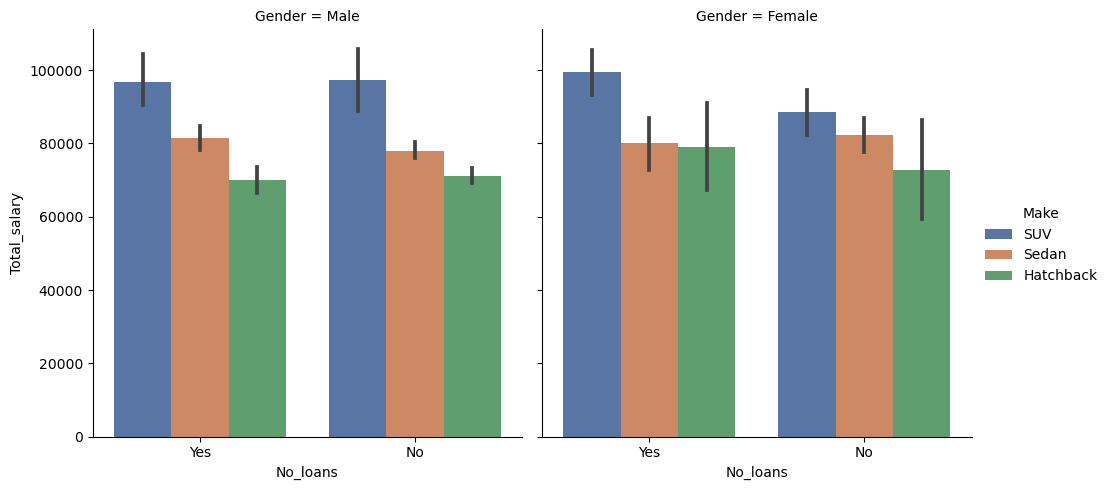

In [116]:
plt.figure(figsize=(5,3))
sns.catplot(data=df,x='No_loans',y='Total_salary',hue='Make' , col='Gender',kind='bar',palette='deep');

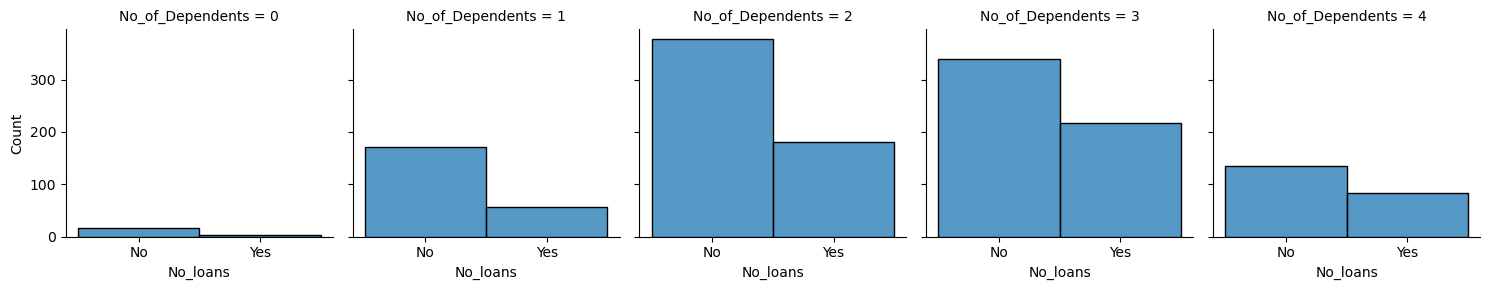

In [117]:
g = sns.FacetGrid(df,col='No_of_Dependents')
g.map(sns.histplot,'No_loans');

# <span style='background :yellow' > Q.14 What can be done to increase the revenue of the company?</span>

<Axes: title={'center': '% Count of cars'}, ylabel='Total_salary'>

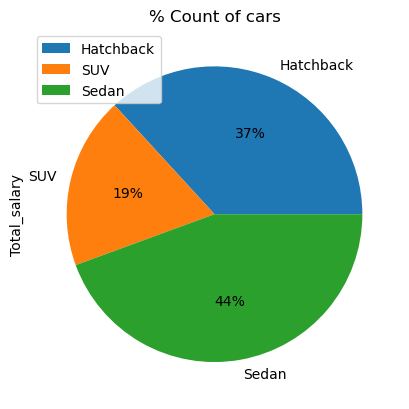

In [118]:
df.groupby(['Make']).count().plot(kind='pie', y='Total_salary', autopct='%1.0f%%', title='% Count of cars')

In [119]:
df.groupby('Make')['Price'].count().sort_values(ascending=False)

Make
Sedan        702
Hatchback    582
SUV          297
Name: Price, dtype: int64

C:\Users\ayush\AppData\Local\Temp\ipykernel_28764\2941052986.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Make']).sum().plot(kind='pie', y='Total_salary', autopct='%1.0f%%', title='Sum of Total Salary')


<Axes: title={'center': 'Sum of Total Salary'}, ylabel='Total_salary'>

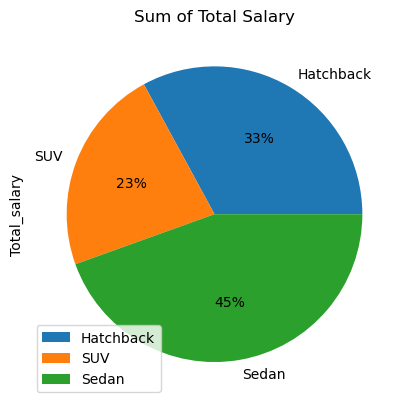

In [120]:
df.groupby(['Make']).sum().plot(kind='pie', y='Total_salary', autopct='%1.0f%%', title='Sum of Total Salary')

In [121]:
df.groupby('Make')['Total_salary'].sum().sort_values(ascending=False)

Make
Sedan        55868500.0
Hatchback    41332500.0
SUV          28328100.0
Name: Total_salary, dtype: float64

C:\Users\ayush\AppData\Local\Temp\ipykernel_28764\393326510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Make']).mean().plot(kind='pie', y='Total_salary', autopct='%1.0f%%', title='Average of Total Salary')


<Axes: title={'center': 'Average of Total Salary'}, ylabel='Total_salary'>

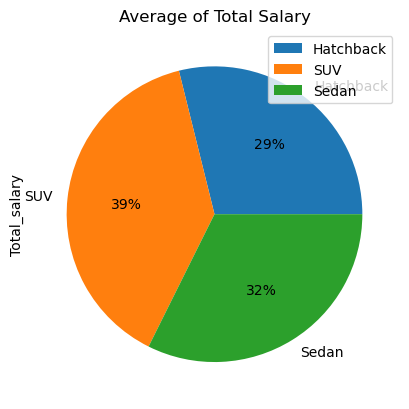

In [122]:
df.groupby(['Make']).mean().plot(kind='pie', y='Total_salary', autopct='%1.0f%%', title='Average of Total Salary')

In [123]:
df.groupby('Make')['Total_salary'].mean().sort_values(ascending=False)

Make
SUV          95380.808081
Sedan        79584.757835
Hatchback    71018.041237
Name: Total_salary, dtype: float64

C:\Users\ayush\AppData\Local\Temp\ipykernel_28764\2034177887.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Make']).sum().plot(kind='pie', y='Price', autopct='%1.0f%%', title='Total Price of car')


<Axes: title={'center': 'Total Price of car'}, ylabel='Price'>

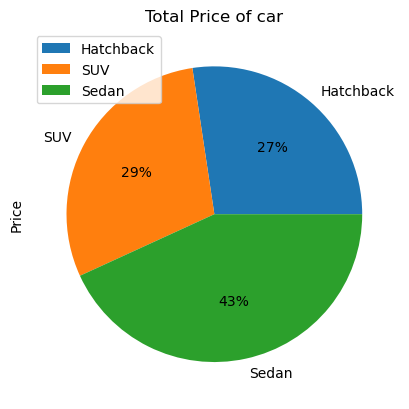

In [124]:
df.groupby(['Make']).sum().plot(kind='pie', y='Price', autopct='%1.0f%%', title='Total Price of car')

In [125]:
df.groupby('Make')['Price'].sum().sort_values(ascending=False)

Make
Sedan        24292000
SUV          16580000
Hatchback    15408000
Name: Price, dtype: int64

C:\Users\ayush\AppData\Local\Temp\ipykernel_28764\768265221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Make']).mean().plot(kind='pie', y='Price', autopct='%1.0f%%', title='Average price of car')


<Axes: title={'center': 'Average price of car'}, ylabel='Price'>

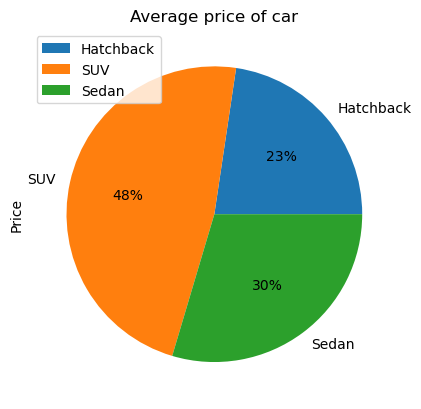

In [126]:
df.groupby(['Make']).mean().plot(kind='pie', y='Price', autopct='%1.0f%%', title='Average price of car')

In [127]:
df.groupby('Make')['Price'].mean().sort_values(ascending=False)

Make
SUV          55824.915825
Sedan        34603.988604
Hatchback    26474.226804
Name: Price, dtype: float64

#

# <span style='background :yellow' >The above cohorts say that, some customers who are buying sedans and hatchbacks have high salary and can be pitched to buy SUVs which will increase the revenue. Now we will identify which customers to pitch.</span>

#

## <span style='background :yellow' >Target customers to pitch:</span>
### <span style='background :white' >1.	Let’s consider customers of salary 1,00,000 and above to be rich customers, the count of these customers is 322 out of 1581 which is around 20%.</span>

### <span style='background :white' >2.	Out of those 20% rich customers 9% customers are buying sedans and 4% are buying hatchbacks. We should target women because mostly women show more interest in purchasing SUVs.</span>


### <span style='background :white' >3.	If we target these rich customers to buy SUVs then our revenue will increase. </span>

# Identifying the rich customers where salary is above 100000

In [128]:
rich = df[df['Total_salary'] > 100000]

In [129]:
rich_percent = len(rich)/df['Total_salary'].count()
rich_percent

0.2036685641998735

In [130]:
rich['Make'].value_counts()

Sedan        144
SUV          120
Hatchback     58
Name: Make, dtype: int64

In [131]:
rich_percent1 = rich['Make'].value_counts()/df['Total_salary'].count()
rich_percent1

Sedan        0.091082
SUV          0.075901
Hatchback    0.036686
Name: Make, dtype: float64

#

## <span style='background :yellow' >What Steps can we take to target the rich customers to increase the SUVs sales:</span>
    
### <span style='background :white' >1.	Give customers spot offers discount for first time visitors.</span>

### <span style='background :white' >2.	Give customers first 2 car servicing free if they go for SUVs.</span>

### <span style='background :white' >3.	Give them some offers in bank loans if applicable. </span>

### <span style='background :white' >4.	Organise an event regarding SUVs purchase and put some offers like spin-the-wheel and give them some gift vouchers to increase sales. </span>

#

# <span style='background :yellow' >Summary & recommendations:</span>

### <span style='background :white' >Sedan contributes 44% of the entire sales and 43% of the total revenue.</span>
### <span style='background :white' >Sedans are preferred by all age group except age group between 50-60, old customers are mostly purchasing SUVs.</span>
### <span style='background :white' >20-30 age group customers are purchasing 60% cars.</span>
### <span style='background :white' >In terms of marital status as married 34% Males are purchasing Sedans, 31% males are purchasing Hatchbacks. 10% females are purchasing SUVs and also females are mostly interested in purchasing SUVs.</span>
### <span style='background :white' >Males who have taken house loan are not purchasing SUVs. For sedans and hatchbacks females who have taken house loan show more interest than males.</span>
### <span style='background :white' >Customers who have taken personal loans are going after Sedans and in terms of money and quantity sedan is the highest. It means that most of the customers are purchasing sedans on personal loans.</span>
### <span style='background :white' >Working partners purchase more cars because they contribute more in terms of revenue, also they are purchasing more sedans. But for SUVs partner working doesn’t show much impact..</span>
### <span style='background :white' >Profession weather it is business or salaried doesn’t show much impact on the purchase pattern.</span>
### <span style='background :white' >57% employee total salary is between the 50000-100000 and 16% employee total salary falls between 70000-80000.</span>

#

# GODIGT Bank Data Analysis starte from here

In [137]:
bank = pd.read_excel('godigt_cc_data.xlsx')

In [138]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [139]:
bank.shape

(8448, 28)

In [140]:
bank.describe()

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
count,8448.00000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8.448000e+03,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,4224.50000,436747.044508,0.292377,0.494792,0.642045,0.284091,0.484493,0.632339,3.614583,3.991951,1.674595e+06,33.164181,0.111269,0.047940,0.080374,0.008878,0.009470,49527.365530,251706.912879
std,2438.87187,30489.752417,0.454881,0.500002,0.479427,0.451007,0.499789,0.482197,2.273193,2.571977,1.064307e+06,15.868344,0.314483,0.213653,0.271888,0.093809,0.096856,46244.954836,229114.856385
min,1.00000,376916.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000950e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2112.75000,426241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.061104e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17110.000000,90000.000000
50%,4224.50000,437551.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,4.000000,1.372134e+06,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37943.000000,150000.000000
75%,6336.25000,438439.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,1.881734e+06,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66095.750000,350000.000000
max,8448.00000,524178.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,8.000000,4.999508e+06,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,289292.000000,990000.000000


# There are 3 numerical columns - 'annual_income_at_source', 'avg_spends_l3m', 'cc_limit'. We will combine all these columns and create one data frame to find the data summary and corelation.


In [141]:
bank1 = bank[['annual_income_at_source' , 'avg_spends_l3m','cc_limit']]

In [142]:
bank1.describe()

,annual_income_at_source,avg_spends_l3m,cc_limit
count,8.448000e+03,8448.000000,8448.000000
mean,1.674595e+06,49527.365530,251706.912879
std,1.064307e+06,46244.954836,229114.856385
min,2.000950e+05,0.000000,0.000000
25%,1.061104e+06,17110.000000,90000.000000
50%,1.372134e+06,37943.000000,150000.000000
75%,1.881734e+06,66095.750000,350000.000000
max,4.999508e+06,289292.000000,990000.000000


In [143]:
bank1.corr()

,annual_income_at_source,avg_spends_l3m,cc_limit
annual_income_at_source,1.000000,0.684695,0.771886
avg_spends_l3m,0.684695,1.000000,0.527270
cc_limit,0.771886,0.527270,1.000000


# Exploring all the variables

# <span style='background :yellow' >Note: We can break the date variable column into three columns like Day, month and year. This will add more value in our analysis and we can dive deeper into the data. But here we are not doing any coding for that, It is just a suggestion
</span>

In [144]:
bank['Issuer'].value_counts()

Visa          7279
Mastercard     728
Amex           441
Name: Issuer, dtype: int64

In [145]:
bank['card_type'].value_counts()

rewards       1502
prosperity    1007
edge           980
chartered      923
smartearn      765
shoprite       688
indianoil      680
cashback       676
aura           652
gold           145
prime          112
pulse          101
elite           96
centurion       62
platinum        59
Name: card_type, dtype: int64

In [146]:
bank['high_networth'].value_counts()

A    1740
D    1696
E    1693
B    1660
C    1659
Name: high_networth, dtype: int64

In [147]:
bank['active_30'].value_counts()

0    5978
1    2470
Name: active_30, dtype: int64

In [148]:
bank['active_60'].value_counts()

0    4268
1    4180
Name: active_60, dtype: int64

In [149]:
bank['active_90'].value_counts()

1    5424
0    3024
Name: active_90, dtype: int64

In [150]:
bank['cc_active30'].value_counts()

0    6048
1    2400
Name: cc_active30, dtype: int64

In [151]:
bank['cc_active60'].value_counts()

0    4355
1    4093
Name: cc_active60, dtype: int64

In [152]:
bank['cc_active90'].value_counts()

1    5342
0    3106
Name: cc_active90, dtype: int64

In [153]:
bank['hotlist_flag'].value_counts()

N    8410
Y      38
Name: hotlist_flag, dtype: int64

In [154]:
bank['widget_products'].value_counts()

7    1132
4    1117
5    1115
6    1062
3    1060
2    1010
1     997
0     955
Name: widget_products, dtype: int64

In [155]:
bank['engagement_products'].value_counts()

4    1017
3     959
1     950
8     949
5     940
0     939
6     926
7     889
2     879
Name: engagement_products, dtype: int64

In [156]:
bank['other_bank_cc_holding'].value_counts()

Y    4728
N    3720
Name: other_bank_cc_holding, dtype: int64

In [157]:
bank['T+1_month_activity'].value_counts()

0    7508
1     940
Name: T+1_month_activity, dtype: int64

In [158]:
bank['T+2_month_activity'].value_counts()

0    8043
1     405
Name: T+2_month_activity, dtype: int64

In [159]:
bank['T+3_month_activity'].value_counts()

0    7769
1     679
Name: T+3_month_activity, dtype: int64

In [160]:
bank['T+6_month_activity'].value_counts()

0    8373
1      75
Name: T+6_month_activity, dtype: int64

In [161]:
bank['T+12_month_activity'].value_counts()

0    8368
1      80
Name: T+12_month_activity, dtype: int64

In [162]:
bank['Transactor_revolver'].value_counts()

T    7115
R    1295
Name: Transactor_revolver, dtype: int64

In [163]:
bank['Occupation_at_source'].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64

# Outlier and null values identification

In [164]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

# In column 'Transactor_revolver' there are some null values, let's check

In [165]:
bank['Transactor_revolver'].value_counts()

T    7115
R    1295
Name: Transactor_revolver, dtype: int64

In [166]:
bank['Transactor_revolver'].unique()

array(['T', 'R', nan], dtype=object)

# There are 38 null values in column 'Transactor_revolver'

# Let's check for outliers in the 3 numerical columns- 'annual_income_at_source', 'avg_spends_l3m', 'cc_limit' one by one

# <span style='background :yellow' >Note: Here we are only identifying the null values and outliers and not treating them.</span>

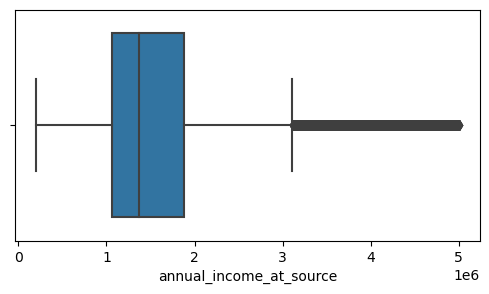

In [167]:
plt.figure(figsize=(6,3))
sns.boxplot(data=bank, x='annual_income_at_source');

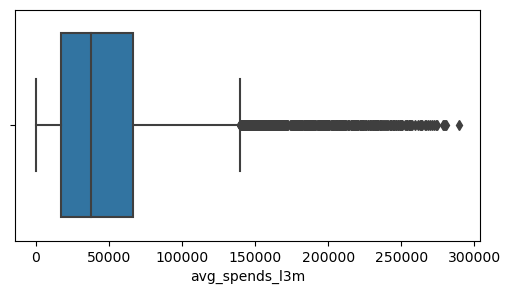

In [168]:
plt.figure(figsize=(6,3))
sns.boxplot(data=bank, x='avg_spends_l3m');

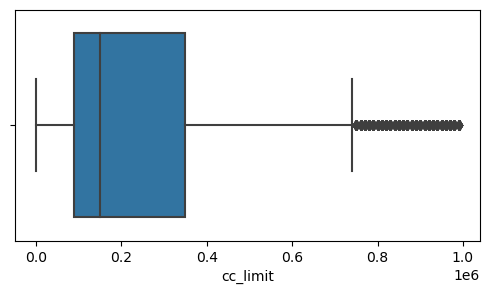

In [169]:
plt.figure(figsize=(6,3))
sns.boxplot(data=bank, x='cc_limit');

In [170]:
bank['Transactor_revolver'].describe()

count     8410
unique       2
top          T
freq      7115
Name: Transactor_revolver, dtype: object

In [171]:
bank['Transactor_revolver'].value_counts()

T    7115
R    1295
Name: Transactor_revolver, dtype: int64

# 

# <span style='background :yellow' >Top Questions that can be asked initially:</span>
## Which issuer does most transaction and what is the total annual income?
## Which card type is widely used and what is the total annual income?
## Which year the count and annual income are highest?
## Which year contributes the highest count of customer’s hotlist flag?
## How many customer’s salary accounts are active within 30 days, 60 days and 90 days?
## How many widget products are popular when compared with card type?
## Which card type has different engagement products?
## How many customers have accounts in other bank, are they high net worth customers?
## How many customer’s credit card are active within 30 days, 60 days and 90 days?
## Show count and annual income of T+1 month activity, T+2 month activity, T+3 month activity, T+6 month activity, T+12 month activity and compare which one is highest?
## Which occupation is highest in terms of count and annual income?
## Which card type and has more CC limit?
## Which customer comes most under hotlist flag?
## In which month the count and annual income is the highest?
## What is the count and annual income of high net-worth customers?
## How many high net-worth customers are under hotlist flag?
## What is the corelation between all variables?
## How many customers have not activated their savings account in past 90 days?
## How many customers have not done any transactions by their credit card in past 90 days?
## What is the relevance of bank vintage with other columns?
## What is the relevance of high net-worth customers with widget products?
## What is the relevance of high net-worth customers with engagement products?
## What is the average spending of high net-worth customers, in which year and month it is highest?
## What steps can be taken to increase the average spending of customers?
## How can we encourage and convert inactive customers to active customers?
## How many customers are transactor and how many are revolvers?
## What is the relevance transactor revolver column with other variables like hotlist flag, annual income, CC limit and high net-worth?
## What is the count of transactor and revolver column year and month wise?
## What is the average spending of customers based on Occupation and transactor and revolver variable?
## Can we say that customers having other bank accounts are less active and do less transaction?
## What is the relevance between occupation of customer and card type?


#

# 

# Ayush Kumar

# 

# THE END